# DATA COLLECTION

Link: [News Dataset Vietnameses](https://www.kaggle.com/datasets/phamtheds/news-dataset-vietnameses)

1.   Articles Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
%cd "/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final"
!ls -lah

/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final
total 3.5G
-rw------- 1 root root 501M Dec 19 16:25 articles_processed.csv
-rw------- 1 root root 1.1G May 29  2022 Dataset_articles_NoID.csv
-rw------- 1 root root 8.1K Dec  9 09:07 GithubManager.ipynb
-rw------- 1 root root 332M Aug  4  2014 glove.6B.100d.txt
-rw------- 1 root root 662M Aug  4  2014 glove.6B.200d.txt
-rw------- 1 root root 164M Aug  4  2014 glove.6B.50d.txt
-rw------- 1 root root 823M Oct 25  2015 glove.6B.zip
-rw------- 1 root root 832K Dec 24 09:42 MachineLearning_Final.ipynb


In [ ]:
!pwd

/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final


# IMPORT LIBRARIES AND MODULES

In [ ]:
!pip install tensorflow
!pip install torch
!pip install gensim

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string as s
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.metrics import  confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical

import torch
from torch import nn
from transformers import AutoModel, AutoTokenizer
from transformers import pipeline
from transformers import AdamW
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

import keras
from keras import layers
from keras import ops

from lightgbm import LGBMClassifier
from gensim.models import KeyedVectors

# DATASET ARTICLES

Topic >>> Label

*   Kinh tế: 1
*   Chính trị:  2
*   Giáo dục: 3
*   Quốc phòng: 5









In [ ]:
fin = "/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final/Dataset_articles_NoID.csv"
articles_dataset = pd.read_csv(fin)

In [ ]:
articles_dataset.head(2)

,URL,Title,Summary,Contents,Date,Author(s),Category,Tags
0,https://laodong.vn/bat-dong-san/thong-tin-ngoc...,"Thông tin “Ngọc Trinh mua đất ở Bảo Lộc"" chỉ l...","Lâm Đồng - Lãnh đạo thành phố Bảo Lộc, Lâm Đồn...","Những ngày vừa qua, trên trang Facebook chính ...","Thứ sáu, 20/05/2022 08:56 (GMT+7)",Phương Nhiên,Bất động sản,"['Lâm Đồng', 'Ngọc Trinh', 'Chiêu trò', 'Giá đ..."
1,https://laodong.vn/bat-dong-san/lo-hong-trong-...,Lỗ hổng trong việc thẩm tra năng lực tài chính...,TPHCM - Việc không thể cưỡng chế thuế của hai ...,"Theo thông tin từ Cục Thuế TP.HCM, hiện cơ qua...","Thứ sáu, 20/05/2022 08:10 (GMT+7)",Gia Miêu,Bất động sản,"['Thủ Thiêm', 'Đấu giá đất']"


In [ ]:
rename_articles_dataset = articles_dataset

In [ ]:
rename_articles_dataset.groupby("Category").count()


,Content
Category,
1,35306
2,58022
3,22738
5,46312


In [ ]:
kinh_te = ["Bất động sản", "Sổ tay kinh tế", "Thông tin doanh nghiệp", "Kinh doanh"]
chinh_tri = ["Phóng sự", "Phóng sự - Điều tra", "Xã hội"]
giao_duc = ["Giáo dục", "Người Việt tử tế"]
cong_nghe = ["Công nghệ"]
quoc_phong = ["Thế giới", "Thời sự"]

def setlabel(value):
  if value in kinh_te:
    return int('1')

  if value in chinh_tri:
    return int('2')

  if value in giao_duc:
    return int('3')

  if value in quoc_phong:
    return int('5')
articles_dataset.head(2)

,Content,Category
17241,"Thay mặt lãnh đạo Đảng, Nhà nước, MTTQ Việt Na...",5
151503,Công ty Cổ phần bánh kẹo Hải Hà vừa công bố bá...,1


In [ ]:
columns_to_rename = {
    "Author(s)" : "Author",
    "Contents" : "Content"
}
columns_to_drop = ["Summary", "Date", "Tags", "URL", "Title", "Date", "Tags", "Author"]

# Applying the renaming first, to ensure the correct column names
rename_articles_dataset = rename_articles_dataset.rename(columns=columns_to_rename)
rename_articles_dataset = rename_articles_dataset.drop(columns = columns_to_drop)

rename_articles_dataset.head(2)

,Content,Category
0,"Những ngày vừa qua, trên trang Facebook chính ...",Bất động sản
1,"Theo thông tin từ Cục Thuế TP.HCM, hiện cơ qua...",Bất động sản


In [ ]:
rename_articles_dataset.Category = rename_articles_dataset.Category.apply(setlabel)
rename_articles_dataset.Category = rename_articles_dataset.Category.fillna(0).astype('int64')

In [ ]:
rename_articles_dataset = rename_articles_dataset[rename_articles_dataset.Category != 0]
rename_articles_dataset = rename_articles_dataset[rename_articles_dataset.Content.notnull()]

In [ ]:
rename_articles_dataset = rename_articles_dataset.sample(frac = 1)
rename_articles_dataset.head(10)

,Content,Category
21044,"Mới đây, truyền thông có bài viết phản ánh việ...",5
8858,"Ngày 12.10, Thứ trưởng Ngoại giao Đặng Hoàng G...",5
20524,"Từ TPHCM, ông Sơn tự bỏ tiền túi mua vé máy ba...",5
190230,Động thái nay diễn ra làm leo thang cuộc chiến...,5
58037,"Như Lao Động đã đưa tin, tại cuộc họp Ban chỉ ...",2
215683,68% doanh nghiệp Việt Nam được khảo sát cho bi...,1
100491,"Ông Nguyễn Thanh Tùng, Trưởng phòng Giáo dục đ...",2
23291,Điểm này được xét tuyển là tổng điểm 3 bài thi...,3
13740,"""Thưa các đồng chí lãnh đạo Đảng, Nhà nước, Mặ...",5
123427,Cụ thể như sau: 1. Bài thi Toán học 2. Bài th...,3


In [ ]:
rename_articles_dataset.Content.describe()

,Content
count,164009
unique,145276
top,Giá vàng trong nước Nguồn: Công ty CP Dịch vụ...
freq,39


# Splitting Data into Input and Label

In [ ]:
fin = "/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final/articles_processed.csv"
articles_dataset = pd.read_csv(fin)
articles_dataset = articles_dataset[articles_dataset.Category != 4]

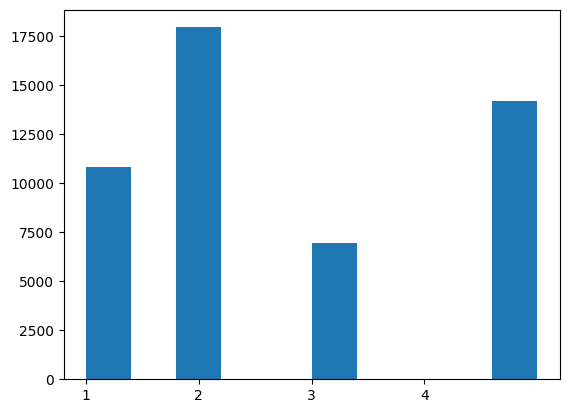

In [ ]:
articles_dataset = articles_dataset.sample(frac = 1)
articles_dataset = articles_dataset.reset_index(drop=True)
articles_dataset = articles_dataset.head(50000)
articles_dataset.head()

index_to_split = int(0.8*len(articles_dataset))

train_x = articles_dataset.Content[:index_to_split]
test_x = articles_dataset.Content[index_to_split:]

train_y = articles_dataset.Category[:index_to_split]
test_y = articles_dataset.Category[index_to_split:]

class_id = articles_dataset.Category
plt.hist(class_id)
plt.xticks(np.arange(1, 5))
plt.show()

tmp_dataset = articles_dataset

# DATA PREPROCESSING

1.  Tokenization
2.  Lowercase






**Tokenization**

In [ ]:
def tokenization(text):
  new_list = text.split()

  return new_list

train_x = train_x.apply(tokenization)
test_x = test_x.apply(tokenization)


**Lowercase**

In [ ]:
def toLowerCase(word):
  new_list = []

  for char in word:
    char = char.lower()
    new_list.append(char)

  return new_list

In [ ]:
train_x = train_x.apply(toLowerCase)
test_x = test_x.apply(toLowerCase)

# REMOVE PUNCTUATION SYMBOLS

In [ ]:
def removePunctuation(word):
    new_list = []

    for char in word:
        for  j in  s.punctuation:
            char = char.replace(j,'')
        new_list.append(char)
    return new_list

train_x=train_x.apply(removePunctuation)
test_x=test_x.apply(removePunctuation)

In [ ]:
train_x=train_x.apply(lambda x: ''.join(i+' ' for i in x))
test_x=test_x.apply(lambda x: ''.join(i+' '  for i in x))

In [ ]:
test_x[:10]


,Content
40000,liên bộ tài chính công thương vừa công bố điề...
40001,carlos hidalgo chủ đại lý chrysler dodge jeep...
40002,đây là mục tiêu chương trình chuyển đổi số y t...
40003,theo đó 20h giờ 30 phút ngày 82 trung tâm kiểm...
40004,345 hộ dân đã được bốc thăm chọn đất tái định ...
40005,nhà ở xã hội là nhà ở có sự hỗ trợ của nhà nướ...
40006,ngay từ đầu giờ giao dịch sáng vnindex đã xanh...
40007,theo ttxvn hòa thượng thích thanh sam xuất gia...
40008,nên xin lỗi đây là chia sẻ của luật sư bùi đìn...
40009,dòng tin tức về việc em học sinh lớp 10 ở tphc...


# FEATURE EXTRACTION

In [ ]:
tfidf = TfidfVectorizer(max_features = 3000, min_df = 10)

train_1 = tfidf.fit_transform(train_x)
test_1 = tfidf.transform(test_x)

In [ ]:
print("No. of features extracted")
print(len(tfidf.get_feature_names_out()))
print(tfidf.get_feature_names_out()[:20])
train_arr = train_1.toarray()
test_arr = test_1.toarray()

No. of features extracted
3000
['0021000303088' '01' '02' '02439232748' '02439232756' '03' '04' '05' '06'
 '07' '08' '09' '0h' '10' '100' '1000' '10000' '100000' '1005755579' '101']


# TRAINING MODELS

MODEL 1 - MULTINOMIAL NAIVE BAYES

In [ ]:
model = MultinomialNB()
model.fit(train_arr,train_y)
pred_val = model.predict(test_arr)

In [ ]:
labels = ['Kinh tế','Chính trị','Giáo dục','Quốc phòng']

def eval_model(y ,y_pred):
    print("F1 score of the model")
    print(f1_score(y, y_pred, average='micro'))

    print("Accuracy of the model")
    print(accuracy_score(y, y_pred))

    print("Accuracy of the model in percentage")
    print(round(accuracy_score(y, y_pred)*100,3),"%")

def confusion_mat(color):
    cof=confusion_matrix(test_y, pred_val)
    cof=pd.DataFrame(cof, index=[i for i in range(1,5)], columns=[i for i in range(1,5)])
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8));

    sns.heatmap(cof, cmap = color,linewidths=1, annot=True,
                square=True, fmt='d', cbar=False,
                xticklabels = labels,
                yticklabels = labels);

    plt.xlabel("Loại tin tức dự đoán", color = "red");
    plt.ylabel("Loại tin tức thật sự", color = "blue");

In [ ]:
multinomial_NB_score = round(accuracy_score(test_y, pred_val)*100,3)

print(multinomial_NB_score)
eval_model(test_y, pred_val)
multinomial_NB_score

83.2
F1 score of the model
0.832
Accuracy of the model
0.832
Accuracy of the model in percentage
83.2 %


83.2

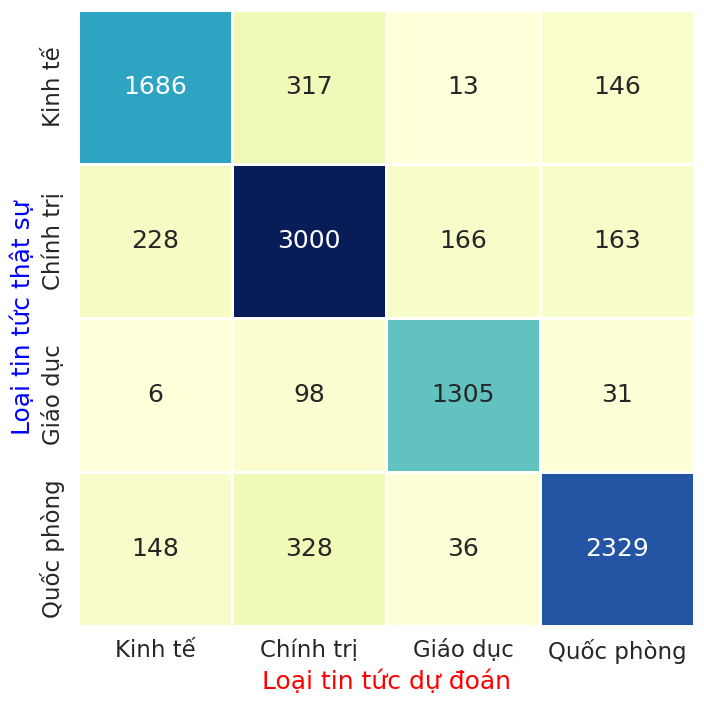

In [ ]:
confusion_mat('YlGnBu')

# MODEL 2- DECISION TREE CLASSIFIER

In [ ]:
model = DecisionTreeClassifier(
    criterion = 'gini',
    splitter = 'best',
    max_depth = None,
    min_samples_split = 2,
    min_samples_leaf = 1,
    max_features = None,
    max_leaf_nodes = None,
    min_impurity_decrease = 0.0,
)
model.fit(train_arr,train_y)
pred_val = model.predict(test_arr)

In [ ]:
decision_tree_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
decision_tree_score

F1 score of the model
0.7347
Accuracy of the model
0.7347
Accuracy of the model in percentage
73.47 %


73.47

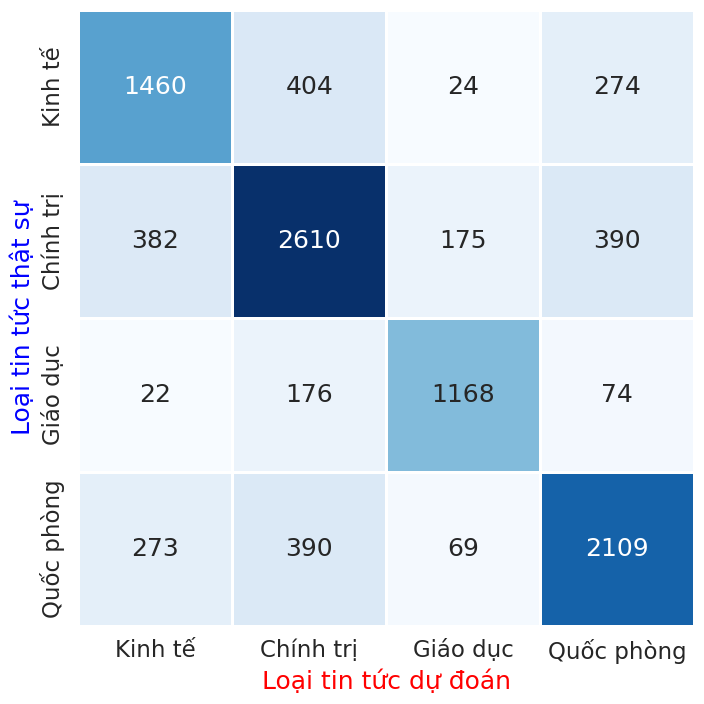

In [ ]:
confusion_mat('Blues')

MODEL 3 - GAUSSIAN NAIVE BAYES

In [ ]:
model = GaussianNB()
model.fit(train_arr,train_y)
pred_val = model.predict(test_arr)

In [ ]:
gaussian_NB_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
gaussian_NB_score

F1 score of the model
0.7781
Accuracy of the model
0.7781
Accuracy of the model in percentage
77.81 %


77.81

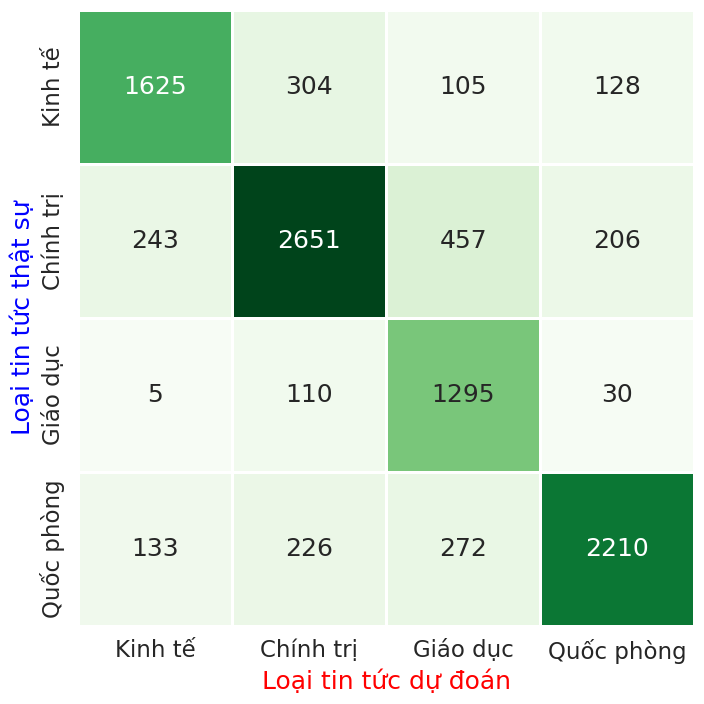

In [ ]:
confusion_mat('Greens')

MODEL 4 - STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [ ]:
model = SGDClassifier(
    loss = 'hinge',
    penalty = 'l2',
    max_iter = 2000,
    tol = 1e-4,
    learning_rate = 'optimal'
)
model.fit(train_arr,train_y)
pred_val = model.predict(test_arr)

In [ ]:
stochastic_GD_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
stochastic_GD_score

F1 score of the model
0.8697
Accuracy of the model
0.8697
Accuracy of the model in percentage
86.97 %


86.97

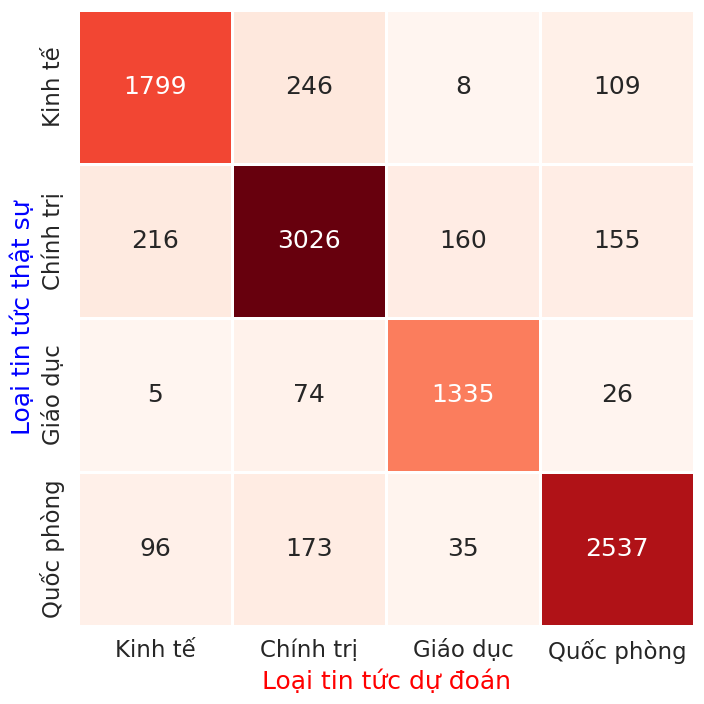

In [ ]:
confusion_mat('Reds')

MODEL 5 - RANDOM FOREST

In [ ]:
model = RandomForestClassifier(
    n_estimators = 150,
    # max_samples = 200,
    # bootstrap = True,
    min_samples_split = 3,
)
model.fit(train_arr,train_y)
pred_val = model.predict(test_arr)

In [ ]:
random_forest_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
random_forest_score

F1 score of the model
0.8579
Accuracy of the model
0.8579
Accuracy of the model in percentage
85.79 %


85.79

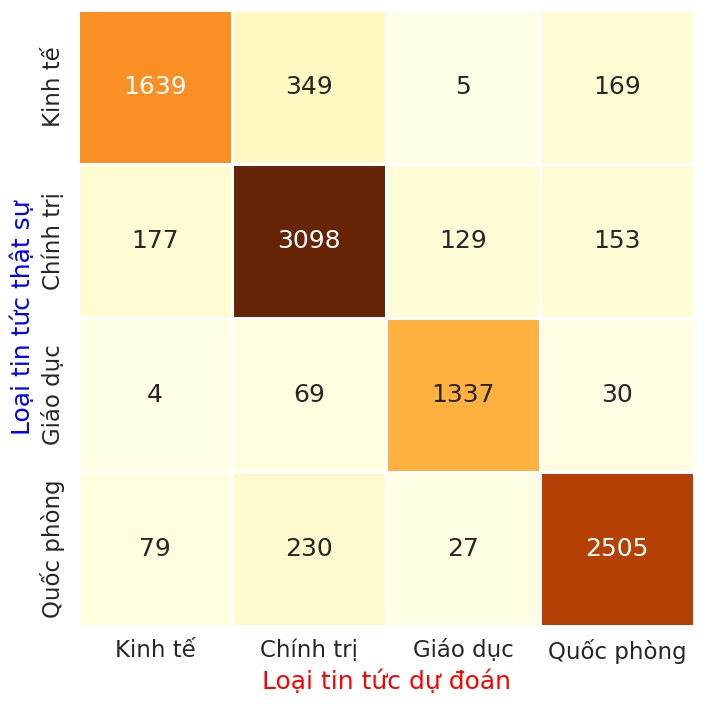

In [ ]:
confusion_mat('YlOrBr')

MODEL 6 - K - NEAREST NEIGHBORS

In [ ]:
model = KNeighborsClassifier(
                              n_neighbors = 13,
                             )
model.fit(train_arr, train_y,)
pred_val = model.predict(test_arr)

In [ ]:
KNN_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
KNN_score

F1 score of the model
0.8342
Accuracy of the model
0.8342
Accuracy of the model in percentage
83.42 %


83.42

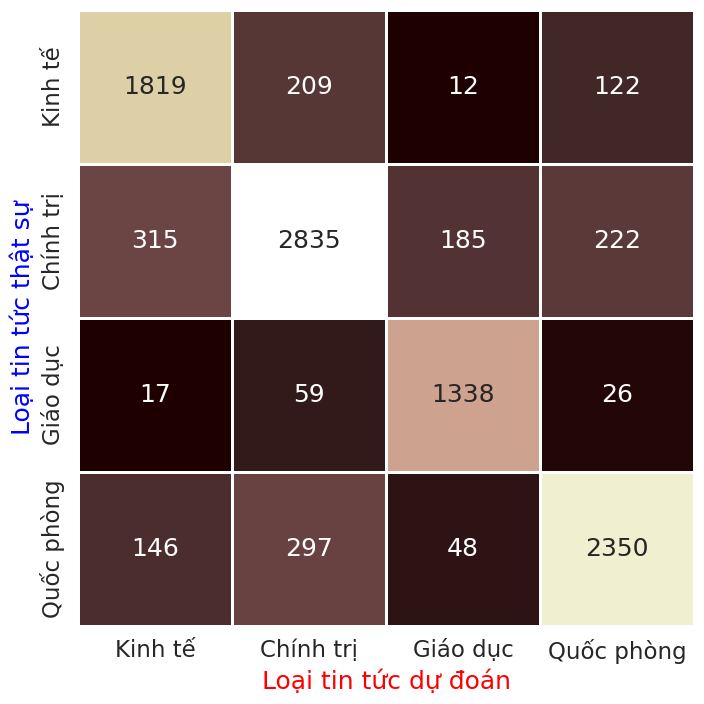

In [ ]:
confusion_mat('pink')

MODEL 7 - REGRESSION

In [ ]:
model = LogisticRegression(
    penalty = "l2",
    tol = 1e-4,
    max_iter = 150,
    solver = "saga",
    multi_class = "multinomial"
)
model.fit(train_arr, train_y)
pred_val = model.predict(test_arr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
rg_score = round(accuracy_score(test_y, pred_val)*100,3)
eval_model(test_y, pred_val)
rg_score

F1 score of the model
0.8705
Accuracy of the model
0.8705
Accuracy of the model in percentage
87.05 %


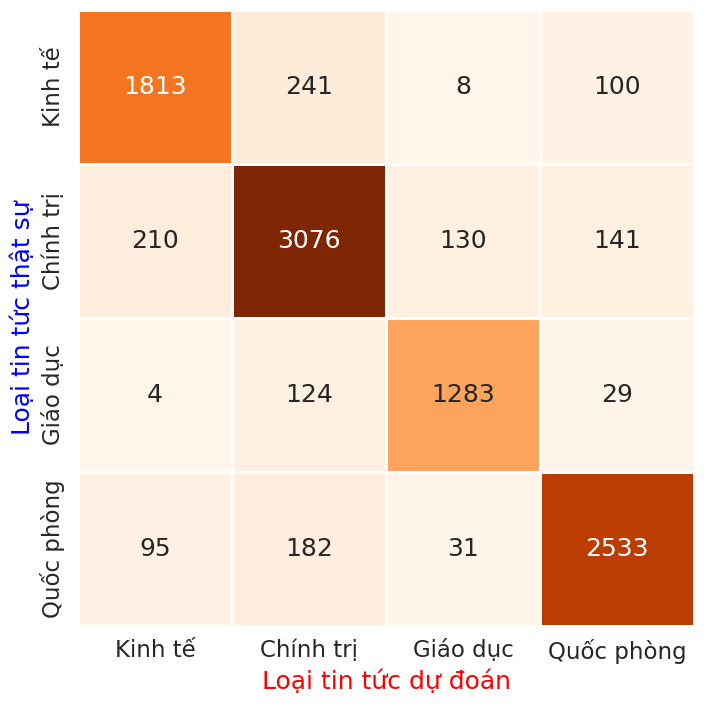

In [ ]:
confusion_mat('Oranges')

# SO SÁNH CÁC MÔ HÌNH PHÂN LOẠI

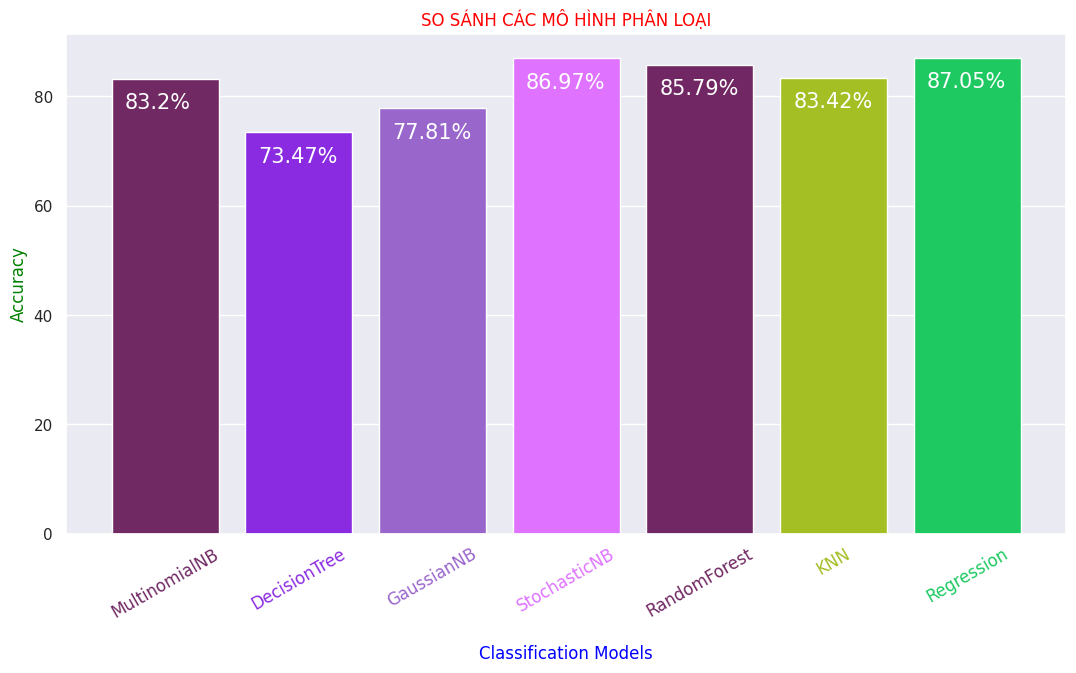

In [ ]:
sns.set()
fig = plt.figure(figsize = (10,5))
ax = fig.add_axes([0,0,1,1])
Models = ['MultinomialNB', 'DecisionTree', 'GaussianNB', 'StochasticNB','RandomForest', 'KNN', 'Regression']
Accuracy=[
    multinomial_NB_score,
    decision_tree_score,
    gaussian_NB_score,
    stochastic_GD_score,
    random_forest_score,
    KNN_score,
    rg_score
]
ax.bar(Models, Accuracy, color = ['#702963','#8a2be2','#9966cc','#df73ff','#702763', '#a3bf24', '#1ec962', '#c91e90']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-5.5, str(round(i.get_height(),2))+'%', fontsize=15, color='white')

xtick_colors = ['#702963', '#8a2be2', '#9966cc', '#df73ff', '#702763', '#a3bf24', '#1ec962']
xticks = ax.get_xticks()
for i, (x, color) in enumerate(zip(xticks, xtick_colors)):
    ax.text(x, -2, Models[i], color=color, fontsize=12, ha='center', va='top', rotation=30)

plt.title("SO SÁNH CÁC MÔ HÌNH PHÂN LOẠI", color = "red");
plt.ylabel('Accuracy', color = 'green');
plt.xlabel('Classification Models', color = 'blue', labelpad = 80);
plt.xticks(rotation = 30, ha='right')
plt.xticks([])  # Ẩn nhãn gốc để thay thế bằng các nhãn đã chỉnh màu
plt.show();


MODEL 8 - LONG SHORT TERM MEMORY (LSTM)

In [ ]:
vocab_size = 10000
embed_size = 32
max_len = 100

# Create and Fit tokenizer
tok = Tokenizer(num_words=vocab_size)
tok.fit_on_texts(train_x)

# Tokenize data
train_x = tok.texts_to_sequences(train_x)
test_x = tok.texts_to_sequences(test_x)

# Pad data
train_x = pad_sequences(train_x, maxlen = max_len)
test_x = pad_sequences(test_x, maxlen = max_len)

# PRETRAINED MODEL

VIN_AI PhoBert

In [ ]:
pipe = pipeline("fill-mask", model="vinai/phobert-base-v2")
phobert = AutoModel.from_pretrained("vinai/phobert-base-v2")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base-v2")

Device set to use cpu
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/phobert-base-v2 and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class PhoBERTClassifier(nn.Module):
    def __init__(self, phobert, num_labels):
        super(PhoBERTClassifier, self).__init__()
        self.phobert = phobert
        self.classifier = nn.Linear(phobert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.phobert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]
        logits = self.classifier(cls_output)
        return logits

In [ ]:
num_labels = 4
PhoBERT_model = PhoBERTClassifier(phobert, num_labels)
print(PhoBERT_model)

PhoBERTClassifier(
  (phobert): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=1)
      (position_embeddings): Embedding(258, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm

In [ ]:
optimizer = AdamW(PhoBERT_model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()
print(optimizer)
print(loss_fn)

AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 2e-05
    weight_decay: 0.0
)
CrossEntropyLoss()


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# LSTM

In [ ]:
# the maximum number of words to keep, based on word frequency
NUM_WORDS = 1000

# dimension of the dense embedding that will be used in the embedding layer of the model
EMBEDDING_DIM = 16

# maximum length of all sequences
MAXLEN = 120

# padding strategy
PADDING = 'post'

# token to replace out-of-vocabulary words during text_to_sequence() calls
OOV_TOKEN = ""

# proportion of data used for training
TRAINING_SPLIT = .8

In [ ]:
tmp_dataset.head()
X = tmp_dataset.Content
Y = tmp_dataset.Category
print(X.shape)
print(Y.shape)

(50000,)
(50000,)


In [ ]:
train_sentences = X[:index_to_split]
val_sentences = X[index_to_split:]
train_labels = Y[:index_to_split]
val_labels = Y[index_to_split:]

print("train_sentences size: ", train_sentences.shape)
print("val_sentences size: ", val_sentences.shape)
print("train_labels size: ", train_labels.shape)
print("val_labels size: ", val_labels.shape)

train_sentences size:  (40000,)
val_sentences size:  (10000,)
train_labels size:  (40000,)
val_labels size:  (10000,)


In [ ]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    # instantiate the Tokenizer class
    tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)

    # fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [ ]:
# fit the Tokenizer
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)

# get word_index
word_index = tokenizer.word_index

print(f"Number of words in the vocabulary: {len(word_index)}\n")

Number of words in the vocabulary: 98843



In [ ]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    # convert training sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences,
                                     maxlen=maxlen,
                                     padding=padding,
                                     truncating='post')

    return padded_sequences

In [ ]:
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Shape of padded training sequences: {train_padded_seq.shape}\n")
print(f"Shape of padded validation sequences: {val_padded_seq.shape}")

Shape of padded training sequences: (40000, 120)

Shape of padded validation sequences: (10000, 120)


In [ ]:
num_unique_categories = np.unique(Y).shape[0]
print(f"Number of unique categories: {num_unique_categories}")

Number of unique categories: 4


In [ ]:
#learning_rate: [1e-5,5e-5,1e-4,5e-4,1e-3,5e-3]
opt = Adam(learning_rate  = 0.001)
def create_lstm_model():
    input_layer = Input(shape=(MAXLEN,))
    # layer = Reshape((10, 30,))(input_layer)
    layer = Embedding(NUM_WORDS, EMBEDDING_DIM, input_length=MAXLEN)(input_layer)
    layer = LSTM(128, activation='relu',dropout=0.5, recurrent_dropout=0.5)(layer)
    layer = Dense(64, activation='relu')(layer)
    layer = Dense(32, activation='relu')(layer)

    output_layer = Dense(num_unique_categories, activation = 'softmax')(layer)

    classifier = Model(input_layer, output_layer)
    classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return classifier

In [ ]:
classifier = create_lstm_model()
classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)           │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_7 (Embedding)              │ (None, 120, 16)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 128)                 │          74,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,708 (393.39 KB)

 Trainable params: 100,708 (393.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
EMBEDDING_DIM = 300
learningRate = 1e-3
batchSize = 32
epochs = 10

classifier.compile(optimizer=Adam(learning_rate = learningRate), loss='categorical_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor = 0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

# LSTM thầy Việt

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
lstm_tokenizer = Tokenizer()
lstm_tokenizer.fit_on_texts(train_x)

In [ ]:
lstm_word_index = lstm_tokenizer.word_index
print('Found %s unique tokens.' % len(lstm_word_index))

Found 113613 unique tokens.


In [ ]:
lstm_vocab_size = len(lstm_tokenizer.word_index) + 1
print('Number of unique words:', lstm_vocab_size)

Number of unique words: 113614


In [ ]:
  lstm_train_x = pad_sequences(lstm_tokenizer.texts_to_sequences(train_x), maxlen = MAX_SEQUENCE_LENGTH)
  lstm_test_x = pad_sequences(lstm_tokenizer.texts_to_sequences(test_x), maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
lstm_test_x.shape

(10000, 30)

In [ ]:
encoder = LabelEncoder()
encoder.fit(train_y.to_list())


LabelEncoder()

In [ ]:
lstm_train_y = encoder.transform(train_y.to_list())
lstm_test_y = encoder.transform(test_y.to_list())

print("lstm_train_y shape: ", lstm_test_y.shape)
print("lstm_test_y shape: ", lstm_test_y.shape)

lstm_train_y shape:  (10000,)
lstm_test_y shape:  (10000,)


In [ ]:
lstm_train_y = lstm_train_y .reshape(-1,1)
lstm_test_y = lstm_test_y .reshape(-1,1)

In [ ]:
print("lstm_train_y shape: ", lstm_test_y.shape)
print("lstm_test_y shape: ", lstm_test_y.shape)

lstm_train_y shape:  (10000, 1)
lstm_test_y shape:  (10000, 1)


In [ ]:
lstm_train_y = to_categorical(lstm_train_y, num_classes = 4)
lstm_test_y = to_categorical(lstm_test_y, num_classes = 4)

In [ ]:
print("lstm_train_y shape: ", lstm_train_y.shape)
print("lstm_test_y shape: ", lstm_test_y.shape)

lstm_train_y shape:  (40000, 4)
lstm_test_y shape:  (10000, 4)


In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip

--2024-12-24 08:19:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-24 08:19:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-24 08:19:37--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# !unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [ ]:
GLOVE_EMB = '/content/drive/MyDrive/Nguyễn Kinh Kha-HCMUE-Công nghệ thông tin-K48-2022--2026/Năm Ba/CAC MON HK1/MachineLearning/Final/glove.6B.200d.txt'
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/text_classification_model.hdf5'

embeddingsIndex = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddingsIndex[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddingsIndex))

Found 400000 word vectors.


In [ ]:
vocab_size = 10000
embeddingMatrix = np.zeros((lstm_vocab_size, EMBEDDING_DIM))
for word, i in lstm_word_index.items():
  embeddingVector = embeddingsIndex.get(word)
  if embeddingVector is not None:
    embeddingMatrix[i] = embeddingVector

In [ ]:
embeddingLayer = tf.keras.layers.Embedding(lstm_vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embeddingMatrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
sequenceInput = Input(shape = (MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embeddingLayer(sequenceInput)

new_lstm_model = SpatialDropout1D(0.2)(embedding_sequences)
new_lstm_model = Conv1D(64, 5, activation='relu')(new_lstm_model)
new_lstm_model = Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2))(new_lstm_model)
new_lstm_model = Dense(128, activation='relu')(new_lstm_model)
new_lstm_model = Dropout(0.5)(new_lstm_model)
new_lstm_model = Dense(34, activation='relu')(new_lstm_model)

outputs = Dense(4, activation='sigmoid')(new_lstm_model)

model = tf.keras.Model(sequenceInput, outputs)

model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_10 (Embedding)             │ (None, 30, 200)             │      22,722,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d_8                  │ (None, 30, 200)             │               0 │
│ (SpatialDropout1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_8 (Conv1D)                    │ (None, 26, 64)              │          64,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_8 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 34)                  │           4,386 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 4)                   │             140 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,824,542 (87.07 MB)

 Trainable params: 101,742 (397.43 KB)

 Non-trainable params: 22,722,800 (86.68 MB)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

EMBEDDING_DIM = 200
learningRate = 1e-3
batchSize = 256
epochs = 10

model.compile(optimizer=Adam(learning_rate = learningRate), loss='categorical_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor = 0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
history = model.fit(lstm_train_x, lstm_train_y,
                    batch_size = batchSize, epochs = epochs,
                    validation_data=(lstm_test_x, lstm_test_y),
                    callbacks=[ReduceLROnPlateau])

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 37s 166ms/step - accuracy: 0.3744 - loss: 1.2888 - val_accuracy: 0.5951 - val_loss: 0.9675 - learning_rate: 0.0010
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 154ms/step - accuracy: 0.5888 - loss: 1.0020 - val_accuracy: 0.6450 - val_loss: 0.8902 - learning_rate: 0.0010
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 155ms/step - accuracy: 0.6323 - loss: 0.9207 - val_accuracy: 0.6524 - val_loss: 0.8636 - learning_rate: 0.0010
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 149ms/step - accuracy: 0.6615 - loss: 0.8682 - val_accuracy: 0.6686 - val_loss: 0.8401 - learning_rate: 0.0010
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 174ms/step - accuracy: 0.6705 - loss: 0.8367 - val_accuracy: 0.6771 - val_loss: 0.8202 - learning_rate: 0.0010
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.6760 - loss: 0.8295 - val_accuracy: 0.6611 - val_loss: 0.8490 - learning_rate: 0.0010
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 41s 147ms/step - accuracy: 0.6

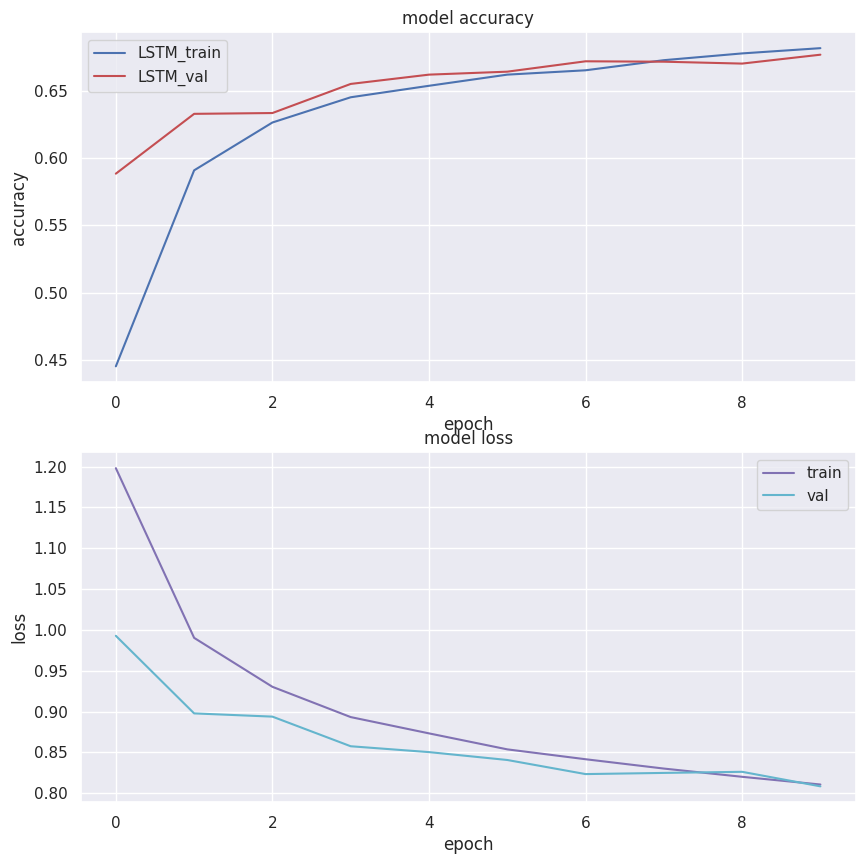

In [ ]:
width, height = 10, 10
s, (at, al) = plt.subplots(2, 1, figsize = (width, height))
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper right')

# plt.tight_layout()
# plt.show()